# Data Wrangling Steps – Credit Card Fraud Detection

## Objective
Clean, merge, and prepare the data for analysis and modeling.

## Steps Performed

1. Imported required libraries (pandas, matplotlib, seaborn, os)
2. Loaded training and test datasets (fraudTrain.csv, fraudTest.csv)
3. Checked the shape of both datasets to understand their size
4. Merged train and test datasets into a single DataFrame for unified analysis
5. Verified the combined dataset shape
6. Checked for missing values and duplicate entries
7. Extracted day, month, and year from the trans_date_trans_time column
8. Calculated the age of cardholders at the time of transaction and created age groups
9. Plotted histogram and box plot to analyze data distribution and detect outliers
10. Checked the percentage of fraud cases in the entire dataset
11. Saved the cleaned dataset in both .pkl and .csv formats


In [60]:
#Import pandas, matplotlib.pyplot, and seaborn below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#from library.sb_utils import save_file

In [61]:
# read test data csv file
cf_test = pd.read_csv("fraudTest.csv")

In [62]:
#read train data csv file
cf_train = pd.read_csv("fraudTrain.csv")

In [63]:
# checked the shape of test data
cf_test.shape

(555719, 23)

In [64]:
# checked the shape of train data
cf_train.shape

(1296675, 23)

In [65]:
# merged traina and test data
data = pd.concat([cf_train,cf_test],axis =0, ignore_index = True)

In [66]:
#checked the shape of whole data
data.shape

(1852394, 23)

In [67]:
#columns of whole data
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [68]:
# checked first few rows of data
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [69]:
# checked the summary of data by using info method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [70]:
# checked for statistical data summary
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [71]:
# checked for any na or null values present in data 
data.isna().any()

Unnamed: 0               False
trans_date_trans_time    False
cc_num                   False
merchant                 False
category                 False
amt                      False
first                    False
last                     False
gender                   False
street                   False
city                     False
state                    False
zip                      False
lat                      False
long                     False
city_pop                 False
job                      False
dob                      False
trans_num                False
unix_time                False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool

In [72]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [73]:
#checked for any duplicate values in data
data.duplicated().sum()

np.int64(0)

In [74]:
# dropped unnamed column 
data.drop('Unnamed: 0', axis =1 , inplace = True)

In [75]:
# converted 'trans_date_trans_time' column to datetime format for time-based analysis
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])


In [76]:
data['year'] = data['trans_date_trans_time'].dt.year
data['month'] = data['trans_date_trans_time'].dt.month
data['day'] = data['trans_date_trans_time'].dt.day
data['hour'] = data['trans_date_trans_time'].dt.hour
data['minute']= data['trans_date_trans_time'].dt.minute

In [77]:
data['unix_time'] = pd.to_datetime(data['unix_time'], unit='s')
data['unix_time']

0         2012-01-01 00:00:18
1         2012-01-01 00:00:44
2         2012-01-01 00:00:51
3         2012-01-01 00:01:16
4         2012-01-01 00:03:06
                  ...        
1852389   2013-12-31 23:59:07
1852390   2013-12-31 23:59:09
1852391   2013-12-31 23:59:15
1852392   2013-12-31 23:59:24
1852393   2013-12-31 23:59:34
Name: unix_time, Length: 1852394, dtype: datetime64[ns]

In [78]:
# converted 'dob' column to datetime format for time-based analysis
data['dob'] = pd.to_datetime(data['dob'])

In [79]:
# calculated age of cardholder at the time of trasaction
data['age'] = data['trans_date_trans_time'].dt.year - data['dob'].dt.year

In [80]:
data['age'].head()

0    31
1    41
2    57
3    52
4    33
Name: age, dtype: int32

In [81]:
def age_group(x):
    if x <=18:
        ag = "teen"
    elif 19 < x <=50:
        ag = "adult"
    else:
        ag = "senior"
    return ag

In [82]:
data["age_group"] = data["age"].apply(age_group)

In [83]:
#data["age_group2"] = [age_group(x) for x in data["age"]]

In [84]:
#del data["age_group2"]

In [85]:
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,age,age_group
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.011293,-82.048315,0,2019,1,1,0,0,31,adult
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,49.159047,-118.186462,0,2019,1,1,0,0,41,adult
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,43.150704,-112.154481,0,2019,1,1,0,0,57,senior
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,47.034331,-112.561071,0,2019,1,1,0,1,52,senior
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.674999,-78.632459,0,2019,1,1,0,3,33,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,39.946837,-91.333331,0,2020,12,31,23,59,54,senior
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.661049,-96.186633,0,2020,12,31,23,59,21,adult
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.658340,-119.715054,0,2020,12,31,23,59,39,adult
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.470525,-117.080888,0,2020,12,31,23,59,55,senior


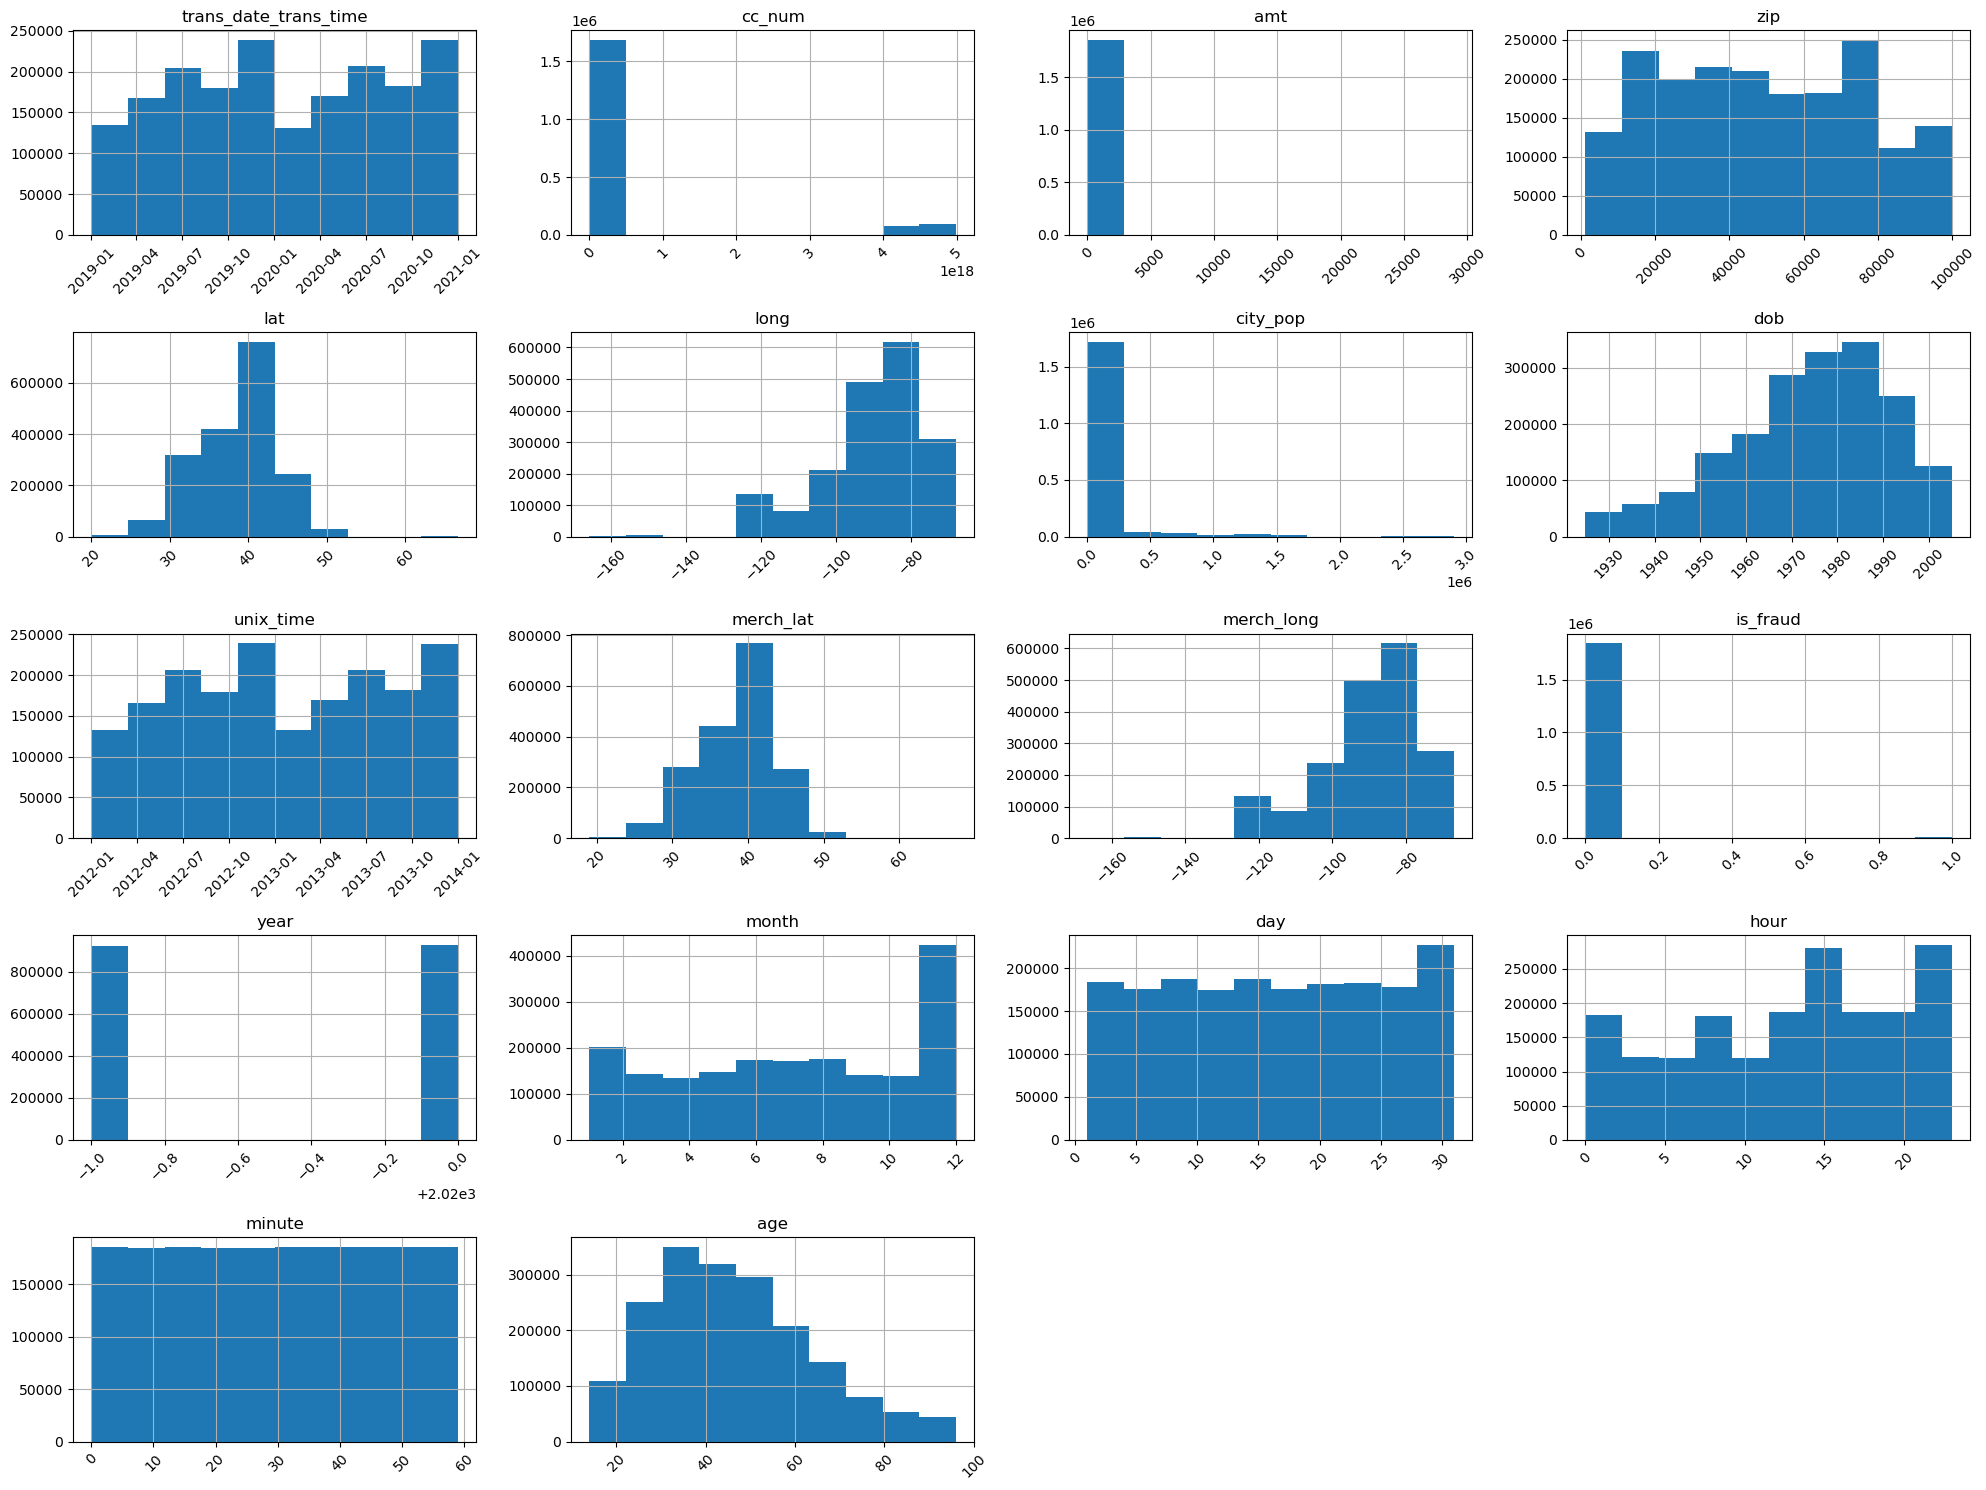

In [86]:
axes = data.hist(figsize = (20,15), bins=10)
for ax in axes.flatten():
    ax.tick_params(axis='x', rotation = 45)
plt.tight_layout()
plt.show()

* The above histogram depicts that amount and city population is highly right skewed it means it may have outliers.

In [87]:
numeric_columns = data.select_dtypes(include='number')


In [88]:
numeric_columns

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,age
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0,2019,1,1,0,0,31
1,630423337322,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,0,2019,1,1,0,0,41
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,0,2019,1,1,0,0,57
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,0,2019,1,1,0,1,52
4,375534208663984,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,0,2019,1,1,0,3,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,43.77,63453,40.4931,-91.8912,519,39.946837,-91.333331,0,2020,12,31,23,59,54
1852390,3556613125071656,111.84,77566,29.0393,-95.4401,28739,29.661049,-96.186633,0,2020,12,31,23,59,21
1852391,6011724471098086,86.88,99323,46.1966,-118.9017,3684,46.658340,-119.715054,0,2020,12,31,23,59,39
1852392,4079773899158,7.99,83643,44.6255,-116.4493,129,44.470525,-117.080888,0,2020,12,31,23,59,55


In [89]:
num_column = ['amt','city_pop','is_fraud','age']

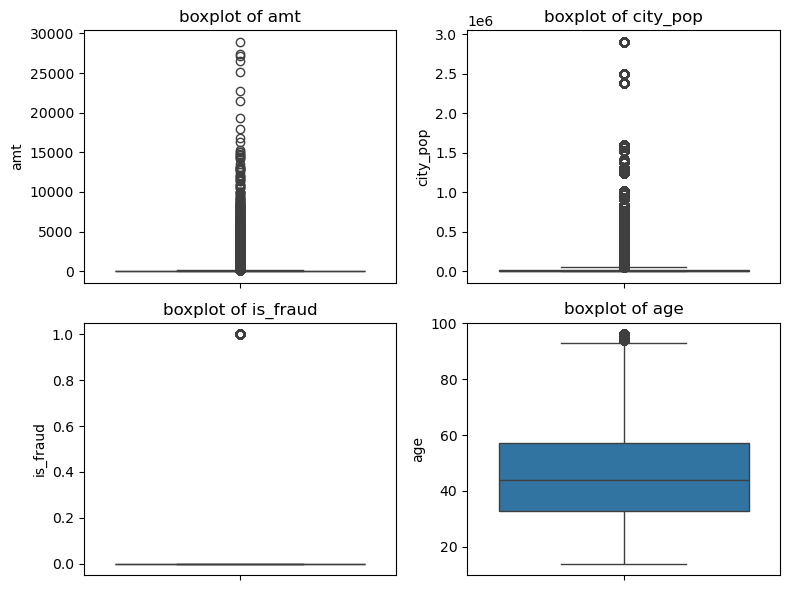

In [90]:
plt.figure(figsize=(8, 6))
for i, col in enumerate(num_column,1):
    plt.subplot(2,2,i)
    sns.boxplot(y=data[col])
    plt.title(f'boxplot of {col}')
plt.tight_layout()
plt.show()

* We can understand from boxplot that amount, city_pop and age contains outiers. 

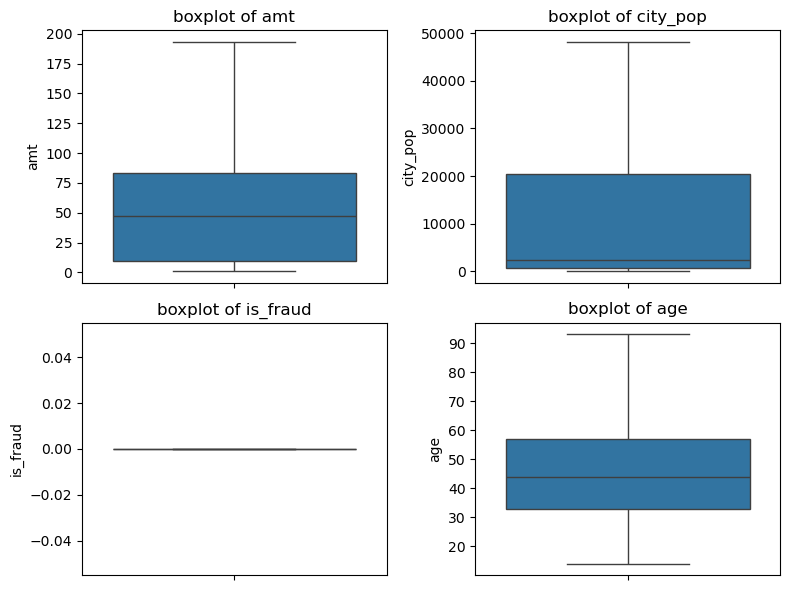

In [91]:
# data without ouliers (used showfliers = False)
plt.figure(figsize=(8, 6))
for i, col in enumerate(num_column,1):
    plt.subplot(2,2,i)
    sns.boxplot(y=data[col],showfliers = False)
    plt.title(f'boxplot of {col}')
plt.tight_layout()
plt.show()

* Now amount, city_population and age are outlier free.Meadian of amount is 50 and median of city pop is around 2-3k and for age it is around 45-46 year.

In [92]:
data['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [93]:
# calculated % of fraud transaction in whole data 
fraud_percent = (data['is_fraud'].sum())/len(data) * 100
print(f'farud percent is {fraud_percent:.2f}%')

farud percent is 0.52%


In [94]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,age,age_group
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.011293,-82.048315,0,2019,1,1,0,0,31,adult
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,49.159047,-118.186462,0,2019,1,1,0,0,41,adult
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,43.150704,-112.154481,0,2019,1,1,0,0,57,senior
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,47.034331,-112.561071,0,2019,1,1,0,1,52,senior
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.674999,-78.632459,0,2019,1,1,0,3,33,adult


In [95]:
data.to_csv("Data_wrangle_credit_card_fraud.csv", index=False)

In [96]:
data.to_pickle("Data_wrangle_credit_card_fraud.pkl")